<a id='top'></a>

# CSCI3022 S21
# Homework 3: Probability and Simulations
***

**Name**: Ara Anner

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1 (Simulation): Let's play some "games"!
***

One of the big payoffs of simulation is that it can let us answer some probability questions that are otherwise quite difficult.  We can instead just simulate the process and get approximate results based on simulation.



***
### A) Poker... pen-and-paper
Game number 1... is Poker!

A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.

Suppose we draw 5 cards at random from the deck.  What is the exact probability that we have a "full house:" a hand with 3 copies of one card face type (of any suits) and the other two cards matches of a different card face type (of any suits)?  Typeset your work below.  You may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.


**First, a poker hand is 5 cards, which means the chance of drawing a full house out of any possible hand puts a denominator of ${52 \choose 5}$. For a full house, you need to choose which card face first (like an Ace or a King), which will be ${13 \choose 1}$. Then, from that face, you'll need to choose 3 of the 4 cards, so ${4 \choose 3}$. For your other two cards, you need to choose something that isn't of the same card face, and choose two cards, so it'll be ${12 \choose 1}$ times ${4 \choose 2}$ (you're choosing 1 different face card, and 2 different cards of any suit).**

**So overall, we seem to have: $$\frac{({13 \choose 1} * {4 \choose 3})({12 \choose 1} * {4 \choose 2})}{52 \choose 5} = \frac{(13 * 4) * (12 * 6)}{2598960} = \frac{6}{4165}$$**

***
### B) Poker with computers!

Write a simulation that draws a hand of 5 cards from a standard 52-card deck. Repeat this simulation 10000 times, and report how many "full house" hands were observed. Verify that the result is consistent with your answer to part A.

NB: The function `np.unique` can make checking hands easier.  Your actual simulation should have 52 distinct cards, even if we're only using the faces (and not suits) for the check of full house.

In [2]:
def card_gen():
    faces = ["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
    
    deck = []
    
    for i in range(0, len(faces)):
        for j in range(0, 4):
            deck.append(faces[i])    
    return deck

def pull_five(deck):
    hand = []
    
    for i in range(0, 5):
        rand_ind = (np.random.randint(len(deck), size=1))[0]
        hand.append(deck[rand_ind])
        deck.remove(hand[i]) # Remove the card from the deck so it's not pulled again.
        
    return hand

def check_full_house(hand):
    
    values,counts = np.unique(hand, return_counts=True)
    
    if 3 in counts and 2 in counts:
        return True
    else:
        return False

def ten_thousand_times():
    full_house_count = 0
    
    for i in range(0,10000):
        
        deck = card_gen()
        hand = pull_five(deck)
        full_house = check_full_house(hand)
        
        if full_house == True:
            full_house_count += 1
    
    print("There was a full house " + str(full_house_count) + " times. That's a probability of " + str((full_house_count/10000) * 100) + "% of the time.")
    print("The original guess was about " + str((6/4165) * 100) + "% of the time.")
    

ten_thousand_times()

#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# The numbers are close and thank god because I have spent an ungodly amount of time on this part.
# The secret was understanding how poker works.

There was a full house 15 times. That's a probability of 0.15% of the time.
The original guess was about 0.14405762304921968% of the time.


The Riddler is a column on the website https://fivethirtyeight.com that posts logic, math, and probability puzzles each week.  Some of puzzles can be attacked by simulation and discrete probability: things that we have the tools to solve!

Parts C/Eare former Riddler prompts.


***
### C) A "solitaire" game

On snowy afternoons, you like to play a solitaire “game” with a standard, randomly shuffled deck of 52 cards. You start dealing cards face up, one at a time, into a pile. As you deal each card, you also speak aloud, in order, the 13 card faces in a standard deck: ace, two, three, etc. (When you get to king, you start over at ace.) You keep doing this until the rank of the card you deal matches the rank you speak aloud, in which case you lose. You win if you reach the end of the deck without any matches.

Set up a simulation to answer the prompt: what is the probability that you win?

Note that your final result should be *close* to the value of $(12/13)^{52}$, which would be the theoretical result if each card flip was independent.  Was it higher or lower?  Does this match your intuition?

In [3]:
def shuffle_deck():

    faces = ["A","2","3","4","5","6","7","8","9","10","J","Q","K"]

    full_deck = faces + faces + faces + faces
    
    shuffled_deck = []
    
    for i in range(0, len(full_deck)):
        rand_ind = (np.random.randint(len(full_deck), size=1))[0]
        shuffled_deck.append(full_deck[rand_ind])
        full_deck.remove(shuffled_deck[i])
    
    return shuffled_deck

def determine_win(shuffled_deck):
    
    faces = ["A","2","3","4","5","6","7","8","9","10","J","Q","K"]

    full_deck = faces + faces + faces + faces
    
    for i in range(0, len(shuffled_deck)):
        if shuffled_deck[i] == full_deck[i]:
            return False
    
    return True

def soltaire_game():
    
    wins = 0
    
    times_played = 10000 # Change this to play more/less times.
    
    for i in range(0, times_played):
        shuffled_deck = shuffle_deck()
        win = determine_win(shuffled_deck)
        
        if win == True:
            wins += 1
    
    print("Out of the " + str(times_played) + " games, " + str(wins) + " were won, giving us a value of " + str(wins/times_played))
    print("Compare this to the expected value of " + str(pow((12/13), 52)) + ".")
        


soltaire_game()

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# The value I get is a little bit lower than the number (0.0154), though I did some prior tests with 100 games, in which my value was higher.
# This is about what I expected, since for the first Ace, you have a 48/52 or 12/13 chance of drawing a "safe" card, and you'd have similar
# fractions as you kept drawing (albeit not exactly 12/13).

Out of the 10000 games, 145 were won, giving us a value of 0.0145
Compare this to the expected value of 0.015572935129947783.


***
### D) Random motion

Suppose that all city streets follow a grid layout, running north-south and east-west. You’re driving north when you decide to play a little game. Every time you reach an intersection, you randomly turn left or right, each with a 50 percent chance.

After driving through 10 intersections, what is the probability that you are still driving north?


In [4]:
def turn_choice(direction):
    choices = ["L", "R"]
    
    choice = random.choice(choices)
    
    if choice == "L":
        if direction == "N":
            return "W"
        elif direction == "W":
            return "S"
        elif direction == "S":
            return "E"
        else:
            return "N"
    else: # TURNING RIGHT
        if direction == "N":
            return "E"
        elif direction == "E":
            return "S"
        elif direction == "S":
            return "W"
        else:
            return "N"

def random_motion():
    direction = "N"
    
    final_dir_nort = 0
    times_tried = 10000
    
    for i in range(0, times_tried):
        for j in range(0, 10):
            direction = turn_choice(direction)
        
        if direction == "N":
            final_dir_nort += 1

    print("We ran the 10-turn simulation " + str(times_tried) + " times, and found that we ended up north " + str(final_dir_nort) + " times.")
    print("That's a " + str((final_dir_nort/times_tried) * 100) + "% chance of it ending up that way.")
    
random_motion()

We ran the 10-turn simulation 10000 times, and found that we ended up north 4997 times.
That's a 49.97% chance of it ending up that way.


***
### E) More Random motion

Now suppose that at every intersection, there’s a one-third chance you turn left, a one-third chance you turn right and a one-third chance you drive straight. Create a set of simulations that record which direction you're driving 11 times.  

It is recommended that you save the results in a data frame of the form below:

| Start | T1 | T2 | T3 | ... | T10 |
| --- | --- |
| N | E | N | W| ... | N |
| N | W | W | S | ... | E|
| N | W | N | E | ... | W|

then create a plot where the $x$ axis is "numbers of turns made" from 0 to 10, and the $y$ axis is "probability that you're driving North."


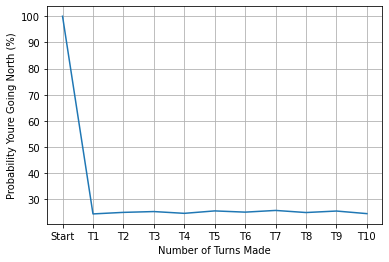

In [5]:
def turn_choice_2(direction):
    choices = ["L", "R", "S"]
    
    rand_ind = (np.random.randint(3, size=1))[0]
    
    choice = choices[rand_ind]
    
    if choice == "L":
        if direction == "N":
            return "W"
        elif direction == "W":
            return "S"
        elif direction == "S":
            return "E"
        else:
            return "N"
    elif choice == "R":
        if direction == "N":
            return "E"
        elif direction == "E":
            return "S"
        elif direction == "S":
            return "W"
        else:
            return "N"
    else:
        return direction

def random_motion_2():
    
    direction = "N"
    times_tried = 10000
    
    df_x = ["Start", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10"]
    df_y = [times_tried, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # We will always start going north, so.
    
    
    for i in range(0, times_tried):
        for j in range(1, 11):
            direction = turn_choice_2(direction)
            
            if direction == "N":
                df_y[j] = df_y[j] + 1
    
    for i in range(0, len(df_y)):
        df_y[i] = (float(df_y[i]) / float(times_tried)) * 100 # Change this to a percent.
     
    plt.plot(df_x, df_y)
    plt.xlabel('Number of Turns Made')
    plt.ylabel('Probability Youre Going North (%)')
    plt.grid(True)
    plt.show()

random_motion_2()

# There appears to be 30% > that we're going north after the start.

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2 (Simulation and Theory): Bayes and Repeated Observations
***


To play a game, you have a bag containing 25 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 10 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

***
### Part A: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

$$P(R_{7}) = \frac{P(Eight) * P(R_{7}) + P(Twenty) * P(R_{7})}{1} = \frac{10}{37} * \frac{1}{8} + \frac{2}{27} * \frac{1}{20}$$

$$= 0.0374874874875$$

***
### Part B: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

$$P(Eight, R_{7}) = \frac{P(Eight) \cap P(R_{7})}{P(R_{7})} = \frac{\frac{10}{37} * \frac{1}{8}}{P(R_{7})}$$
$$= 0.901201602136$$

***
### Part C: Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

**We know $P(Eight) \cap P(R_{7})$ from part b ($\frac{5}{148}$, for reference), and $P(Eight)$ and $P(R_{7})$. Mathematically, we should have:**
$$P(Eight \cap R_{7} = P(Eight)P(R_{7})$$
$$\frac{5}{148} = \frac{10}{37}P(R_{7})$$
$$\frac{5}{148} \ne \frac{749}{73926}$$

**So, we know the events are dependent.**

*** 
### Part D:  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

**Note, I'm going to dub $P(L_{1}) = \frac{25}{37} * \frac{1}{6} + \frac{10}{37} * \frac{1}{8} + \frac{2}{37} * \frac{1}{20}$ (Chance of picking a d6 and rolling the value + chance of picking a d8 and rolling the value + chance of picking up a d20 and rolling the value).**

$$P(S | L_{1}) = \frac{P(S) \cap P(L_{1})}{P(L_{1})}$$
$$P(S | L_{1}) = \frac{\frac{25}{37} * \frac{1}{6}}{P(L_{1})}$$
$$ = 0.755287009063$$

***
### Part E:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

$$P(L_{n}) = \frac{25}{37} * \frac{1}{6^{n}} + \frac{10}{37} * \frac{1}{8^{n}} + \frac{2}{37} * \frac{1}{20^{n}}$$
$$P(S | L_{n}) = \frac{\frac{25}{37} * \frac{1}{6^{n}}}{P(L_{n})}$$

In [6]:
def prob_six(n):
    
    L_n = (25 / 37) * (1/pow(6, n)) + (10/37) * (1/pow(8, n)) + (2/37) * (1/pow(20,n))
    
    PSL_n = ((25 / 37) * (1/(pow(6, n)))) / L_n
    
    return PSL_n

# Verification of Part D answer:  plug in n=1
print(prob_six(1))

0.755287009063444


***
### Part F:  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [7]:
#code
print(prob_six(7))
print(prob_six(8))

# Technically, it'd be somewhere between 7 and 8 rolls, but that's not physically possible, so we'd go with 8.

0.949297047289715
0.9614918524668586


[Back to top](#top)
<a/ id='p3'></a>

## (5 pts) Problem 3 (Theory): It's probably Bayes
***


To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *hypothesis* that has a 7% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *hypothesis* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *hypothesis* is false is 5%

If they *find* an important result they are published.  What is the probability that their *hypothesis* was true, given that they were published?

**We'll use Bayes Theorem to solve this. We will set A to hypothesis = true, and B to published.**

**Probability of being published if the hypothesis is true/P(B|A) = 50% (hypothesis true, important result) of 100% (being published if imporant result) = 50%**

**Probability of hypothesis being true in general = 7%**

**Probability of being published in general = 50% (important find, hypothesis true) + 5% (important find, hypothesis false) = 55%**

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
$$P(A|B) = \frac{0.5 * 0.07}{0.55}$$
$$P(A|B) = 0.0636363636364, \text{or } 6.36\text{%}$$

[Back to top](#top)